# Step 1: Import basic libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For better-looking plots
sns.set(style="whitegrid")

Step 2: Upload Excel file

In [27]:
from google.colab import files
uploaded = files.upload()

Saving default of credit card clients.xls to default of credit card clients (1).xls


Step 3: Read the Excel file

In [28]:
df = pd.read_excel("default of credit card clients.xls", header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Step 4: Dataset shape and basic info

In [29]:
print("Shape of the dataset:")
print(df.shape)  # (rows, columns)

print("\nColumn names:")
print(df.columns.tolist())

print("\nChecking for missing values:")
print(df.isnull().sum())


Shape of the dataset:
(30000, 25)

Column names:
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']

Checking for missing values:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2            

Class distribution (0 = No Default, 1 = Default):
default payment next month
0    23364
1     6636
Name: count, dtype: int64

Default rate: 22.12%



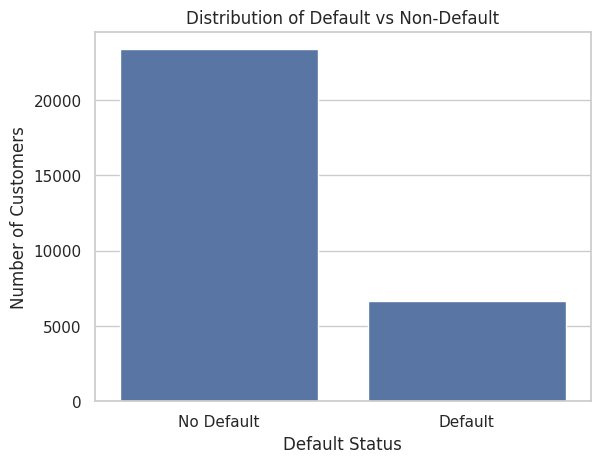

In [30]:
# Step 5: Target variable exploration

# Count of default (1) vs non-default (0)
print("Class distribution (0 = No Default, 1 = Default):")
print(df['default payment next month'].value_counts())

# Calculate percentage of defaulters
default_rate = df['default payment next month'].mean() * 100
print(f"\nDefault rate: {default_rate:.2f}%")

# Plot the class distribution
print()
sns.countplot(x='default payment next month', data=df)
plt.title("Distribution of Default vs Non-Default")
plt.xlabel("Default Status")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()


# Step 6: Summary Statistics and Correlation

Step 6.1: Summary statistics

In [31]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Step 6.2: Correlation heatmap

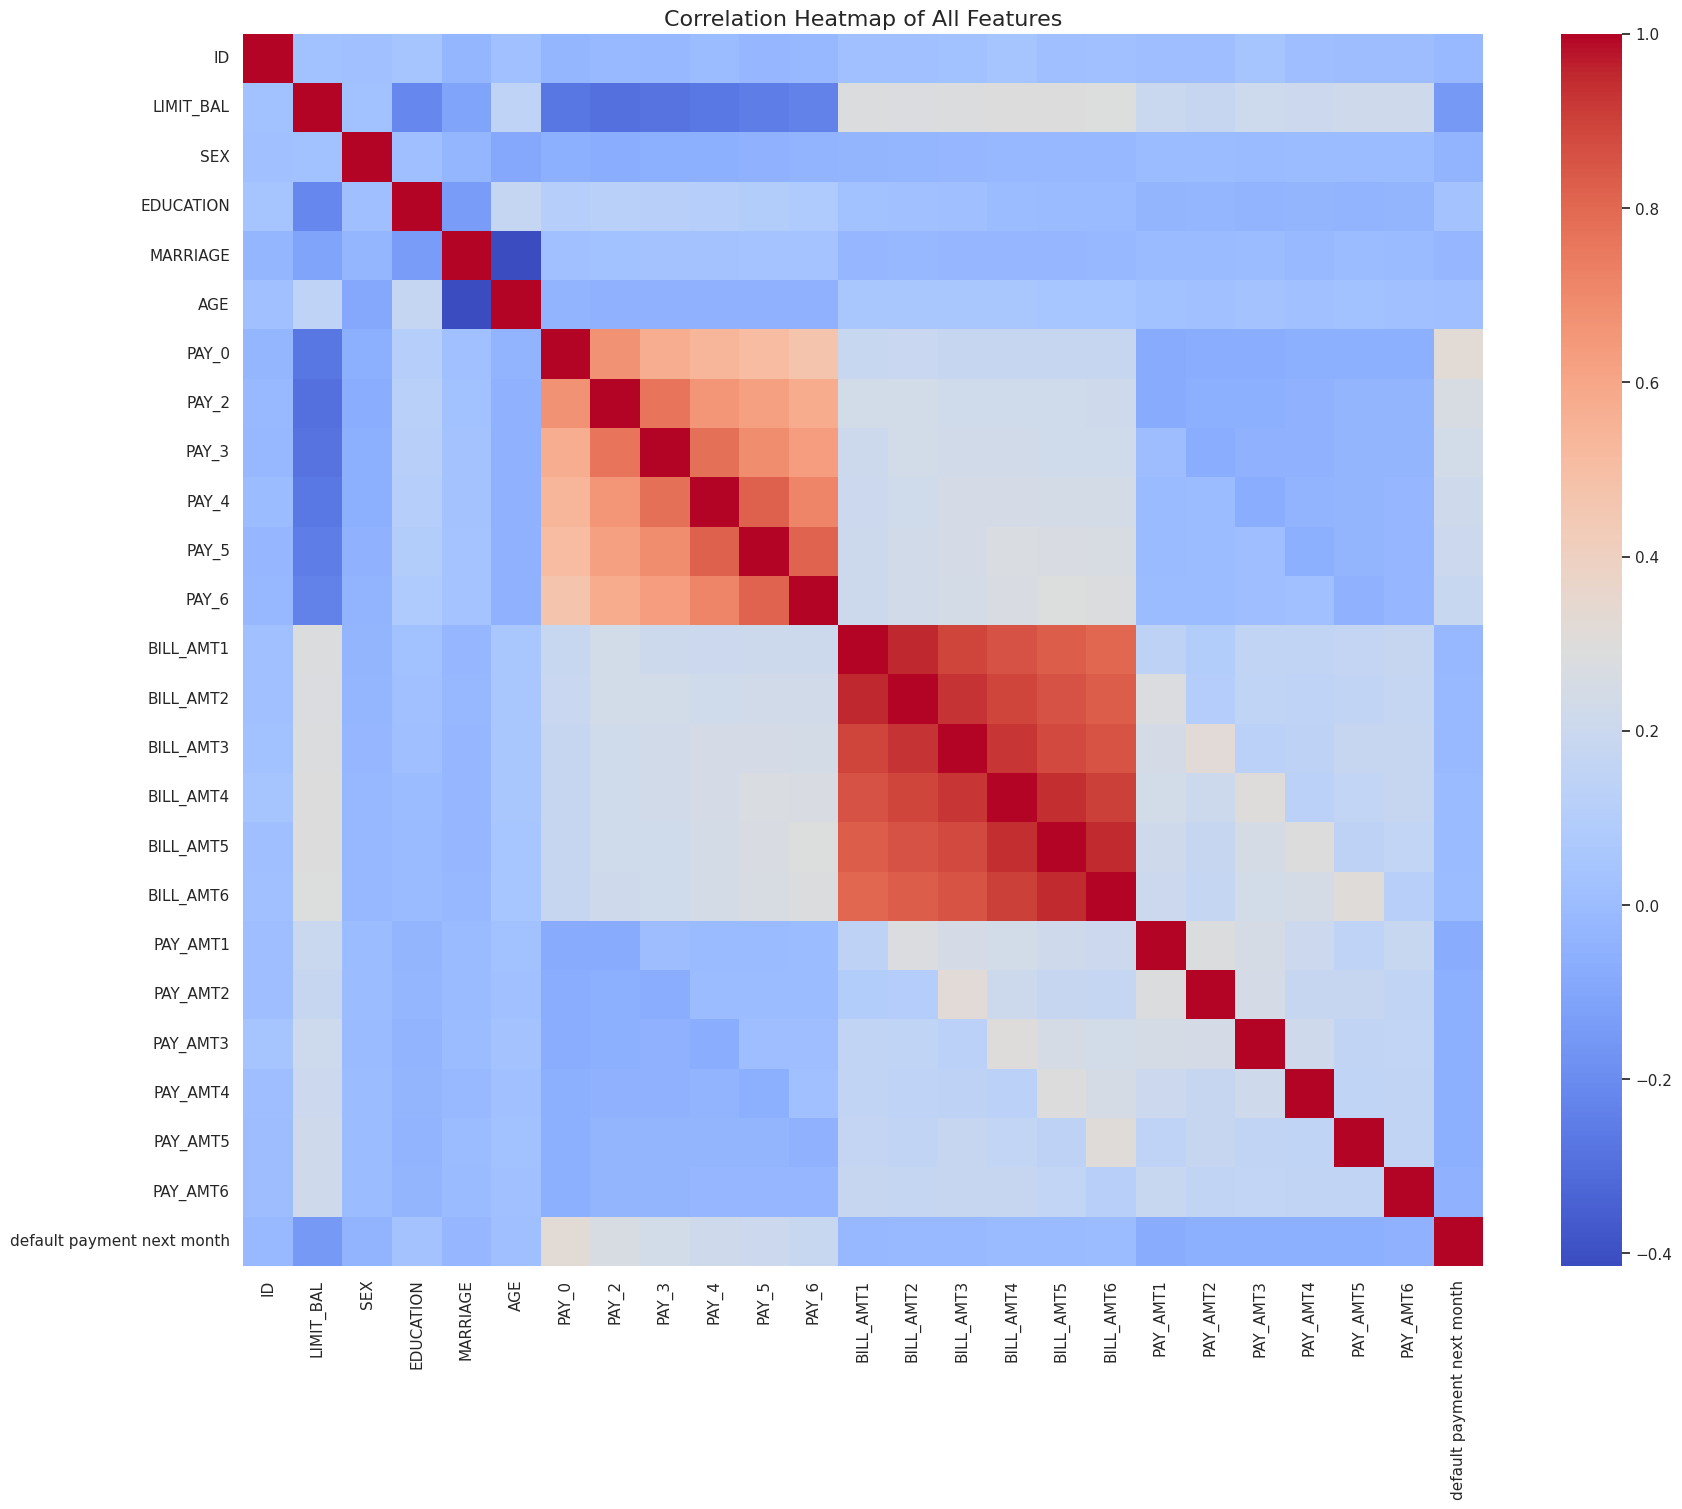

In [32]:
plt.figure(figsize=(20, 16))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap of All Features", fontsize=16)
plt.show()


Step 6.3: Correlation with the target (sorted)

In [33]:
cor_target = corr_matrix["default payment next month"].sort_values(ascending=False)
print("Top features positively correlated with default:")
print(cor_target.head(10))

print("\nTop features negatively correlated with default:")
print(cor_target.tail(10))


Top features positively correlated with default:
default payment next month    1.000000
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
EDUCATION                     0.028006
AGE                           0.013890
BILL_AMT6                    -0.005372
Name: default payment next month, dtype: float64

Top features negatively correlated with default:
BILL_AMT1   -0.019644
MARRIAGE    -0.024339
SEX         -0.039961
PAY_AMT6    -0.053183
PAY_AMT5    -0.055124
PAY_AMT3    -0.056250
PAY_AMT4    -0.056827
PAY_AMT2    -0.058579
PAY_AMT1    -0.072929
LIMIT_BAL   -0.153520
Name: default payment next month, dtype: float64


 7.1. Rename the Target Column (clean it)

# Step 7: Data Preprocessing

In [34]:
# Step 7.1: Rename the target column to remove spaces
df.rename(columns={"default payment next month": "default"}, inplace=True)

 7.2. Drop ID Column (Not useful)

In [35]:
# Step 7.2: Drop the ID column (not useful for prediction)
df.drop(columns=["ID"], inplace=True)

7.3. Split Features and Target

In [36]:
# Step 7.3: Split the data into features (X) and target (y)
X = df.drop(columns=["default"])  # All features
y = df["default"]                 # Target column

7.4. Standardize Feature Values

In [37]:
from sklearn.preprocessing import StandardScaler

# Step 7.4: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

7.5. Train-Test Split

In [38]:
from sklearn.model_selection import train_test_split

# Step 7.5: Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Training Model

# Step 8: Logistic Regression Model


8.1. Train the Model

In [39]:
from sklearn.linear_model import LogisticRegression

# Step 8.1: Create and train the model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

8.2. Make Predictions

In [40]:
# Step 8.2: Predict on the test set
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]  # Probability of class 1 (default)

8.3. Evaluate the Model

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Step 8.3: Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

Accuracy: 0.6796666666666666
Precision: 0.36724676483712626
Recall: 0.6201959306706858
F1 Score: 0.461322869955157
ROC-AUC: 0.7081279991794965


8.4. Plot the Confusion Matrix

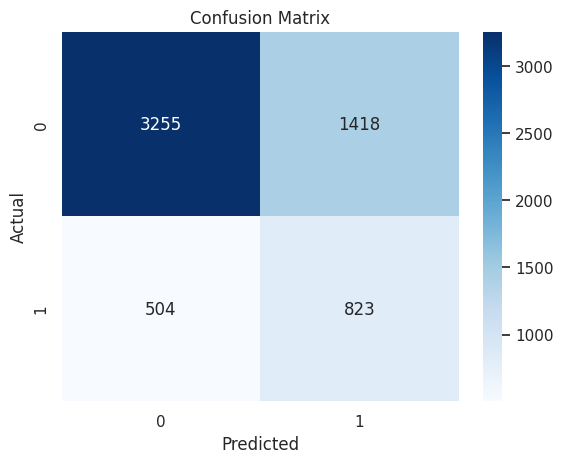

In [42]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Step 8.4: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 9: Random Forest Model

9.1. Train the Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Step 9.1: Train a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',  # Handle class imbalance
    max_depth=None
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

9.2. Make Predictions

In [44]:
# Step 9.2: Predict using the trained model
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]  # probability of class 1 (default)

9.3. Evaluate the Model

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 9.3: Evaluate the Random Forest model
print("Random Forest Evaluation Metrics:\n")
print(classification_report(y_test, rf_pred))

# ROC AUC
print("ROC-AUC Score:", roc_auc_score(y_test, rf_proba))

Random Forest Evaluation Metrics:

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000

ROC-AUC Score: 0.7522618270295566


9.4. Confusion Matrix

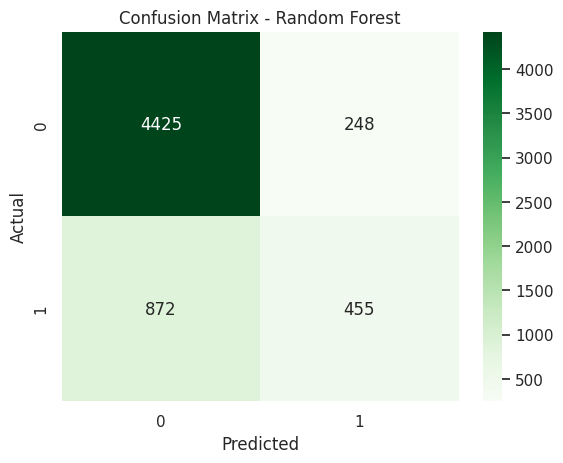

In [46]:
# Step 9.4: Plot confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

What does this mean?
🟩 Random Forest is better at identifying people who will NOT default (very few false alarms = low FP)

🟥 But it's worse at catching actual defaulters (more false negatives = it misses risky customers)

So it's more conservative — it protects good customers but fails to flag many risky ones.

In [47]:
# Predict with threshold = 0.4 instead of 0.5
custom_threshold = 0.4
rf_proba_custom = rf_model.predict_proba(X_test)[:, 1]
rf_pred_custom = (rf_proba_custom >= custom_threshold).astype(int)

Classification Report with Threshold = 0.4:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      4673
           1       0.59      0.45      0.51      1327

    accuracy                           0.81      6000
   macro avg       0.72      0.68      0.69      6000
weighted avg       0.79      0.81      0.80      6000



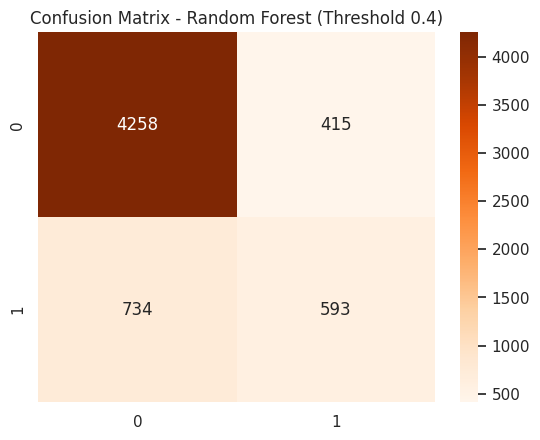

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report with Threshold = 0.4:")
print(classification_report(y_test, rf_pred_custom))

sns.heatmap(confusion_matrix(y_test, rf_pred_custom), annot=True, fmt='d', cmap="Oranges")
plt.title("Confusion Matrix - Random Forest (Threshold 0.4)")
plt.show()

# Step 11: Train XGBoost Model

11.1. Install XGBoost (only once)

In [49]:
!pip install xgboost

11.2. Import & Train XGBoost Classifier

In [50]:
from xgboost import XGBClassifier

# Step 11.2: Create and train the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]),  # handles imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:29:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

11.3. Predict Probabilities & Apply Threshold = 0.4

In [51]:
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]
xgb_pred = (xgb_proba >= 0.4).astype(int)

11.4. Evaluate Performance

XGBoost Classification Report (Threshold = 0.4):
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      4673
           1       0.39      0.72      0.50      1327

    accuracy                           0.69      6000
   macro avg       0.64      0.70      0.64      6000
weighted avg       0.78      0.69      0.71      6000



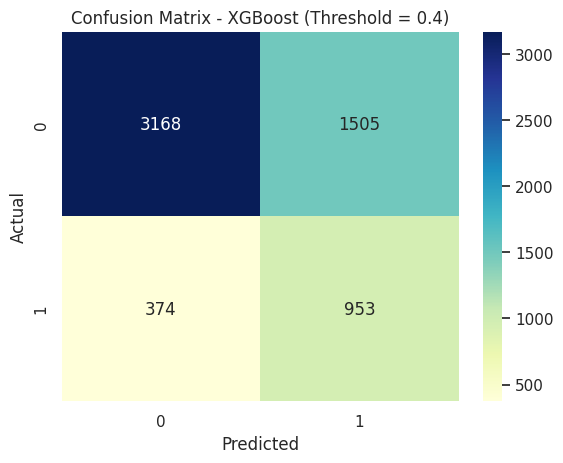

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

print("XGBoost Classification Report (Threshold = 0.4):")
print(classification_report(y_test, xgb_pred))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - XGBoost (Threshold = 0.4)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Using Grid Search

Step 1: Import Modules

In [55]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

Step 2: Define Parameter Grid

In [56]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}

Step 3: Initialize Model & GridSearchCV

In [59]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1],
    'n_estimators': [100],
    'scale_pos_weight': [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}

Step 4: Fit the Grid Search

In [60]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:40:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'scale_pos_weight': [1, 3.520625353173856]},
             scoring='f1', verbose=1)

Step 5: Get Best Model & Evaluate

Classification Report (Best XGBoost with GridSearchCV):
              precision    recall  f1-score   support

           0       0.90      0.64      0.75      4673
           1       0.37      0.75      0.50      1327

    accuracy                           0.66      6000
   macro avg       0.63      0.69      0.62      6000
weighted avg       0.78      0.66      0.69      6000



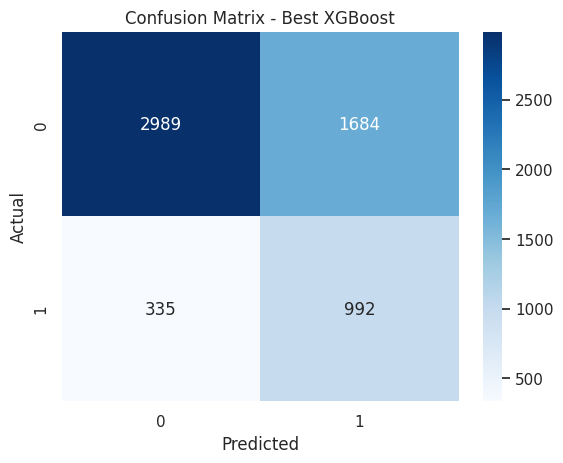

In [61]:
# Get the best model
best_xgb = grid.best_estimator_

# Predict with threshold 0.4
best_proba = best_xgb.predict_proba(X_test)[:, 1]
best_pred = (best_proba >= 0.4).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report (Best XGBoost with GridSearchCV):")
print(classification_report(y_test, best_pred))

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, best_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Best XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
import joblib

# Save model
joblib.dump(best_xgb, 'best_credit_model.pkl')

['best_credit_model.pkl']